# Reactive power

Nobody _really_ knows what reactive power is or how can it be the case that work is done when intensity and voltage have opposite signs. This humble mathematician has looked at the matter and created the following notebook.

## Setup

It will argument around the following circuit:

<center><img src="circuit.png"/></center>

It contains an AC generator, one capacitor and one resistor (say, a bulb). Note that:

- Capacitors absorbe and release energy. Over a full AC cycle, the net energy consumed by an ideal capacitor is 0. It does not mean that at a certain time point it is not draining energy from the grid, though.
- Resistances do absorbe (or use) energy according to the $RI^2$ rule.

But first, I am going to model the circuit and then I'll ask the model the relevant questions.

In [7]:
import numpy as np
import matplotlib.pyplot as plt

Constants and setup:

In [8]:
v_0 = 1.0   # peak AC voltage by "the grid"
c   = 0.1   # capacitance
r   = 3.0   # resistance

# "grid" voltage over time (12 full cycles)
t = np.linspace(0, 12, 10000)
v = v_0 * np.sin(2 * np.pi * t)

Model. 

First, we measure the capacitor voltage, $V_c$ over time. On the one hand, we have the _voltage_ equation

$$V(t) = I(t)R + V_c(t);$$

on the other, derived from $Q_c = C V_c$,

$$I = C \frac{dV_c}{dt}.$$

Combine them and you have

$$\frac{dV_c}{dt} = \frac{V(t) - V_c(t)}{RC}.$$

Later, having calculated $V_c$, you can just get the intensity overtime:

$$I(t) = \frac{V(t) V_c(t)}{R}.$$

This is,

In [9]:
t_incr = np.max(t) / len(t)
v_c = np.zeros(len(t))
intensity = np.zeros(len(t))

for i in range(1, len(t)):
    v_c[i] = v_c[i - 1] + t_incr * (v[i-1] - v_c[i-1]) / (r * c)

intensity = (v - v_c) / r

## Simulation results

As expected, there is a mismatch between the grid voltage and the capacitor voltage:

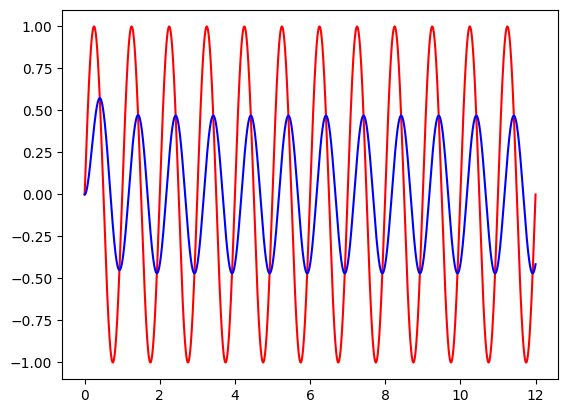

In [10]:
plt.plot(t, v,  color='red');
plt.plot(t, v_c, color='blue');

Also, between grid voltage and intensity:

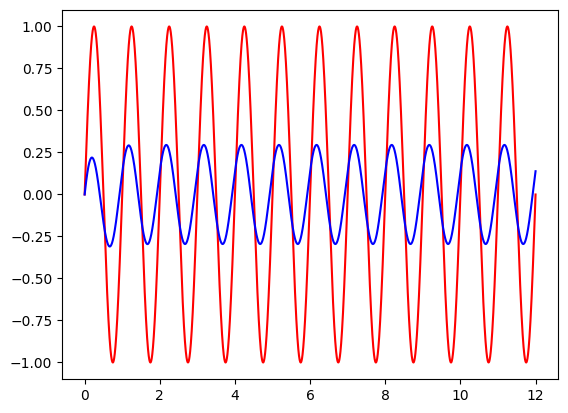

In [11]:
plt.plot(t, v,  color='red');
plt.plot(t, intensity, color='blue');

At some points, they have different signs. It happens when:
- Grid voltage is low (in absolute terms).
- The capacitor is releasing energy (discharging). Part of this energy will be consumed by the resistance and the rest will flow back to the grid.

If the voltage of the capacitor is higher than the grid's, the capacitor will push current to the grid and beat all those mighty nuclear power stations, hydropower plants, etc. on the other side!

But let's look at what happens to the bulb itself. The bulb does not know anything about the external world. It only finds a voltage difference (equal to $V(t)- V_c(t)$) and an intensity $I(t)$ flowing through it. And they are _perfectly aligned_, as expected:

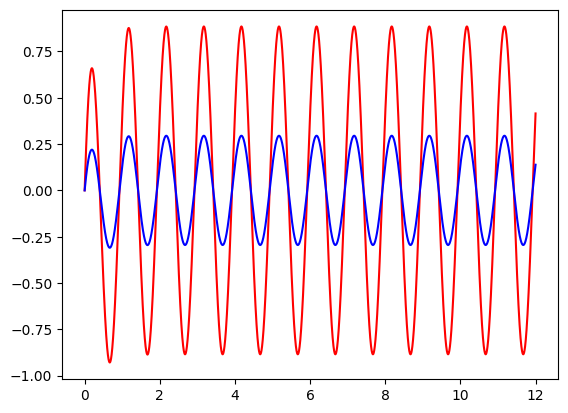

In [12]:
plt.plot(t, v - v_c,  color='red');
plt.plot(t, intensity, color='blue');

## Energy considerations

Let's look now at the energy consumed by our circuit during the full 12 cycles. I'll do it in three different ways.

For the first one, I will use the fact that:
- Over a cycle, the capacitor consumes no energy.
- Only the bulb consumes energy.

So I can just do $\int_0^T R I^2(t) dt$ or, equivalently, 

$$\int_0^T V_b(t) I(t) dt = \int_0^T (V(t) - V_c(t)) I(t) dt.$$

In [13]:
real_energy_0 = t_incr * np.sum(r * intensity**2)
real_energy_0

1.5397516463063095

Check:

In [14]:
t_incr * np.sum((v - v_c) * intensity)

1.5397516463063095

Note that Schwarz's inequality states that

$$\int f(t) g(t) dt \le \sqrt{\int f^2(t) dt \int g^2(t) dt}$$

and that the inequality becomes an equality if $f(t) = \lambda g(t)$ for some $\lambda$. But this is our case! Here,

In [15]:
v_rms = np.sqrt(t_incr * np.sum((v - v_c) **2))
i_rms = np.sqrt(t_incr * np.sum(intensity **2))
i_rms * v_rms

1.5397516463063095

(And, please, note how the fact that the voltage is a sinusoid has not been used above for anything whatsoever.)

Now, let's calculate the energy from the grid perspective. The grid knows nothing about what the circuit contains. In only sees its own voltage an the current through it. The energy is:

$$\int_0^T V(t) I(t) dt.$$

In [16]:
real_energy_1 = t_incr * np.sum(v * intensity)
real_energy_1 

1.5452256958523642

Note that the summands in the previous expression are not all positive. At some very short time intervals, energy is flowing out of the circuit to the grid, as indicated before.

But we can still play with the expression

$$\int_0^T V(t) I(t) dt$$

rewriting it as 

$$\int_0^T (V(t) - V_c(t)) I(t) dt + \int_0^T V_c(t) I(t) dt.$$

The first integral is the _bulb's integral_, the second one, the _capacitor's_. We know that this second one evaluates to zero:

In [17]:
t_incr * np.sum(v_c * intensity)

0.005474049546054761

But in this case the product of the _root mean average_ voltages and intensities, is far (below, because of Schwarz's inequality) from the actual readings:

In [18]:
v_rms = np.sqrt(t_incr * np.sum(v**2))
i_rms = np.sqrt(t_incr * np.sum(intensity **2))
i_rms * v_rms

1.7547636143604521

If you have independent voltage and intensity measures, often aggregated in the form of _root mean squared_ values, their product will overestimate the actual energy consumed by the circuit.

## Final notes

A discrepancy between the _apparent_ and the _real_ energy is a consequence of Schwarz's inequality. It will appear whenever $V \neq \lambda I$. And there may be different non-excluding scenarios in which this discrepancy may happen:

- There is a phase discrepancy between $V$ and $I$, as in the circuit above.
- $I$ has a _different shape_ than $V$ because of [switched power supplies](https://en.wikipedia.org/wiki/Switched-mode_power_supply), for instance.

As we speak, in my home, the _rms_ intensity and voltage are $1.32 A$ and $231.4 V$ respectively. The apparent power is then $305.44 W$. However, the actual reading is of $265 W$.

The difference is today's Mr. Schwartz's meal.